In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

C:\Users\lisal\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

from sklearn.preprocessing import StandardScaler



In [7]:
# Create a StandardScaler instance
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_market_data)

# Convert the scaled data back into a DataFrame
df_market_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the first 10 rows of the scaled DataFrame
df_market_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [8]:
# Your scaled DataFrame is already prepared with 'coin_id' as the index
df_market_scaled.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

In [9]:
# Display the first 10 rows of the scaled DataFrame to check the structure and scaling
print(df_market_scaled.head(10))


                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))



In [11]:
from sklearn.cluster import KMeans


wss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_scaled)
    wss.append(kmeans.inertia_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

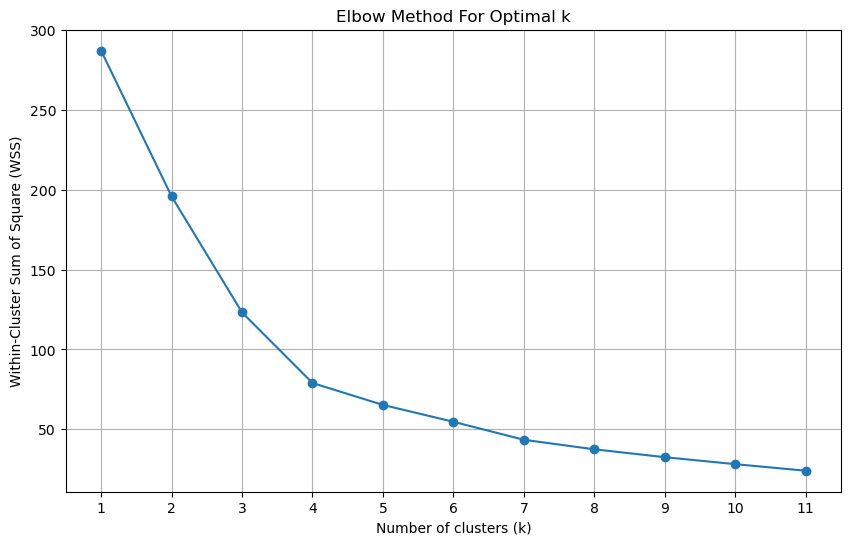

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, wss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Square (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler


In [16]:
print(df_market_data_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to my data and transform it
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Convert the scaled data back into a DataFrame
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, index=df_market_data.index, columns=df_market_data.columns)


In [18]:
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_market_data_scaled)
    inertia_list.append(model.inertia_)




c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans

df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols = df_market_data.select_dtypes(include=['float64', 'int64']).columns

df_market_data_scaled = scaler.fit_transform(df_market_data[numerical_cols])

df_market_data_scaled = pd.DataFrame(df_market_data_scaled, index=df_market_data.index, columns=numerical_cols)


In [20]:
# Create an empty list to store the inertia values
inertia_list = []


k_values = range(1, 12)

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    model.fit(df_market_data_scaled)
    
    # Append the model's inertia to the inertia list
    inertia_list.append(model.inertia_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [21]:
# Print the inertia values to see the results
print("Inertia values for different k:")
for k, inertia in zip(k_values, inertia_list):
    print(f"k={k}: Inertia={inertia}")


Inertia values for different k:
k=1: Inertia=287.0
k=2: Inertia=195.82021818036046
k=3: Inertia=123.19048183836955
k=4: Inertia=79.02243535120978
k=5: Inertia=65.302379141625
k=6: Inertia=54.739921942100196
k=7: Inertia=43.48160605008145
k=8: Inertia=37.51703249010357
k=9: Inertia=32.59189097672458
k=10: Inertia=28.222899290608932
k=11: Inertia=24.116198421409198


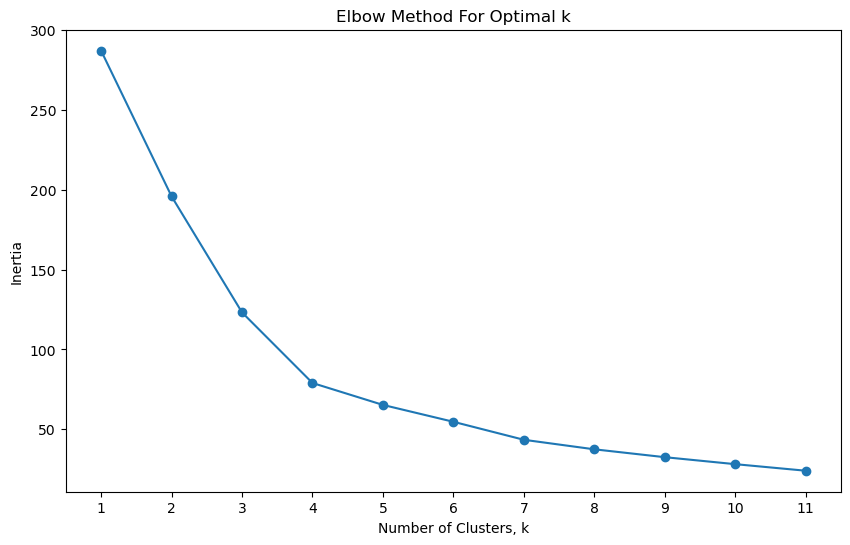

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_list, '-o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


In [23]:
# Create a dictionary to store the data for the Elbow curve
elbow_data = {'Number of Clusters (k)': k_values, 'Inertia': inertia_list}

# Create a DataFrame from the dictionary
elbow_df = pd.DataFrame(elbow_data)


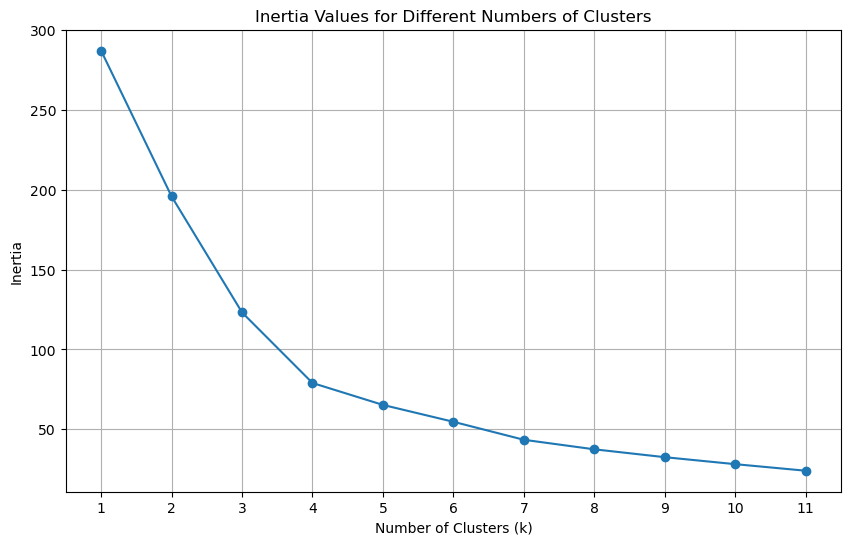

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_list, marker='o', linestyle='-')
plt.title('Inertia Values for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [25]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(df_market_data_scaled)



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [27]:
# Fit the K-Means model using the scaled data
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(df_market_data_scaled)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [28]:
# Predict the clusters for the scaled data
cluster_labels = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(cluster_labels)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [29]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()



In [30]:
# Add a new column 'Cluster' to the DataFrame with the predicted clusters
df_market_data_copy['Cluster'] = cluster_labels

# Display sample data to verify the addition of the new column
print(df_market_data_copy.head())



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [31]:
import hvplot.pandas

# Define the columns for x and y axes
x_column = "price_change_percentage_24h"
y_column = "price_change_percentage_7d"

# Create the scatter plot with hvPlot
scatter_plot = df_market_data_copy.hvplot.scatter(
    x=x_column,
    y=y_column,
    c='Cluster',  # Color the points based on the 'Cluster' column
    cmap='viridis',  # Choose a colormap for coloring
    hover_cols=['coin_name'],  # Include the cryptocurrency name in hover information
    title='Scatter Plot of Cryptocurrency Price Changes',
    xlabel='Price Change Percentage (24 hours)',
    ylabel='Price Change Percentage (7 days)'
)

# Display the scatter plot
scatter_plot



:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [32]:
from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)



In [33]:
# Fit the PCA model to the scaled data
pca.fit(df_market_data_scaled)


PCA(n_components=3)

In [34]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_components = pca.fit_transform(df_market_data_scaled)

# Convert the PCA components array to a DataFrame
df_pca_components = pd.DataFrame(pca_components, index=df_market_data_scaled.index, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame
print(df_pca_components.head())



                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [35]:
# Retrieve the explained variance ratio from the PCA model
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to display the explained variance ratio
df_explained_variance = pd.DataFrame(
    explained_variance_ratio,
    index=['PC1', 'PC2', 'PC3'],
    columns=['Explained Variance Ratio']
)

# Display the DataFrame
print(df_explained_variance)



     Explained Variance Ratio
PC1                  0.371986
PC2                  0.347008
PC3                  0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance = 0.371986 + 0.347008 + 0.176038

Total Explained Variance ≈ 0.895032

So, the total explained variance of the three principal components is approximately 0.895032.

In [37]:
# Check the columns in df_market_data
print(df_market_data.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


---

In [38]:
# Creating a DataFrame with the PCA data
df_pca_data = pd.DataFrame(pca_components, index=df_market_data_scaled.index, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_pca_data.index.name = 'coin_name'

# Display sample data
print(df_pca_data.head())


                   PC1       PC2       PC3
coin_name                                 
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [39]:
# Create a list with k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [40]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(df_pca_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [41]:
import pandas as pd

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow_curve)


    Number of Clusters (k)     Inertia
0                        1  256.874086
1                        2  165.901994
2                        3   93.774626
3                        4   49.665497
4                        5   37.839466
5                        6   30.777746
6                        7   21.134056
7                        8   17.091637
8                        9   13.681140
9                       10   10.630648
10                      11    8.128620


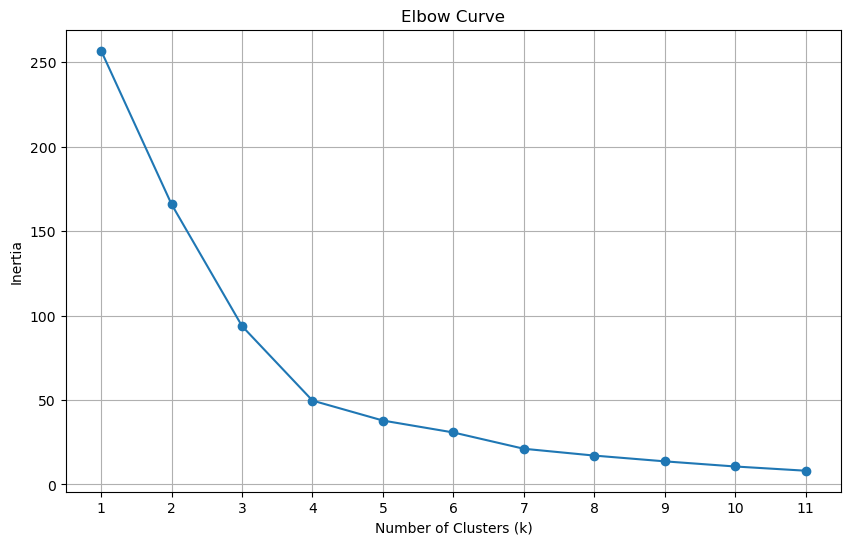

In [42]:
import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_curve['Number of Clusters (k)'], df_elbow_curve['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow_curve['Number of Clusters (k)'])
plt.grid(True)
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 4 it's the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [43]:
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k
best_kmeans_model = KMeans(n_clusters=4, random_state=42)



In [44]:
# Fit the K-Means model using the PCA data
best_kmeans_model.fit(df_pca_data)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [45]:
# Predict the clusters using the PCA data
clusters = best_kmeans_model.predict(df_pca_data)

# Print the resulting array of cluster values
print(clusters)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [46]:
# Create a copy of the DataFrame with the PCA data
df_pca_data_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_data_copy['Cluster'] = clusters

# Display sample data
print(df_pca_data_copy.head())



                   PC1       PC2       PC3  Cluster
coin_name                                          
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [52]:
import pandas as pd

# Create an empty DataFrame to store inertia values
df_pca_elbow_curve = pd.DataFrame(columns=['Number of Clusters (k)', 'Inertia'])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

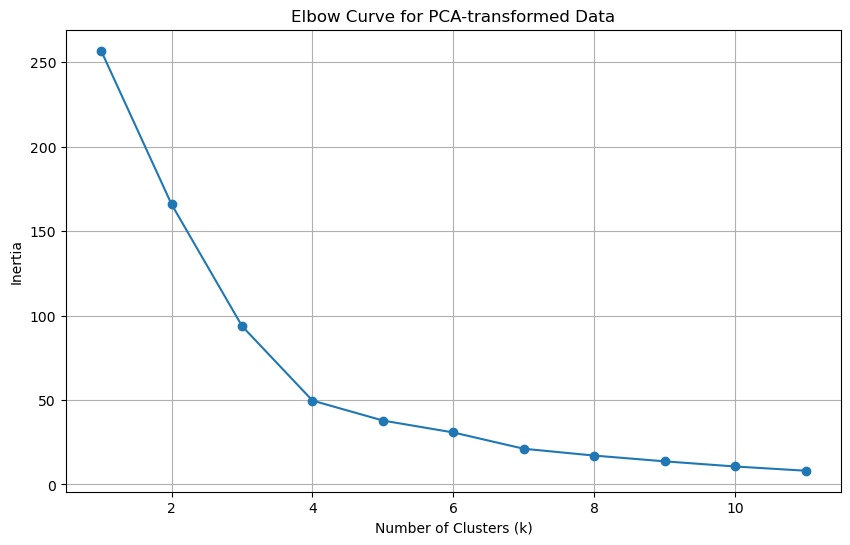

In [54]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia_values = []

# Define a range of k-values
k_values = range(1, 12)

# Loop through each value of k
for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA-transformed data
    kmeans.fit(df_pca_data)
    
    # Calculate inertia and store it in the list
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Create a DataFrame from the inertia values
df_pca_elbow_curve = pd.DataFrame({'Number of Clusters (k)': k_values, 'Inertia': inertia_values})

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_pca_elbow_curve['Number of Clusters (k)'], df_pca_elbow_curve['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve for PCA-transformed Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [56]:
# 'cluster_labels' contains the cluster labels obtained from KMeans clustering
df_market_data['Cluster'] = cluster_labels


In [58]:
df_pca_data['Cluster'] = cluster_labels


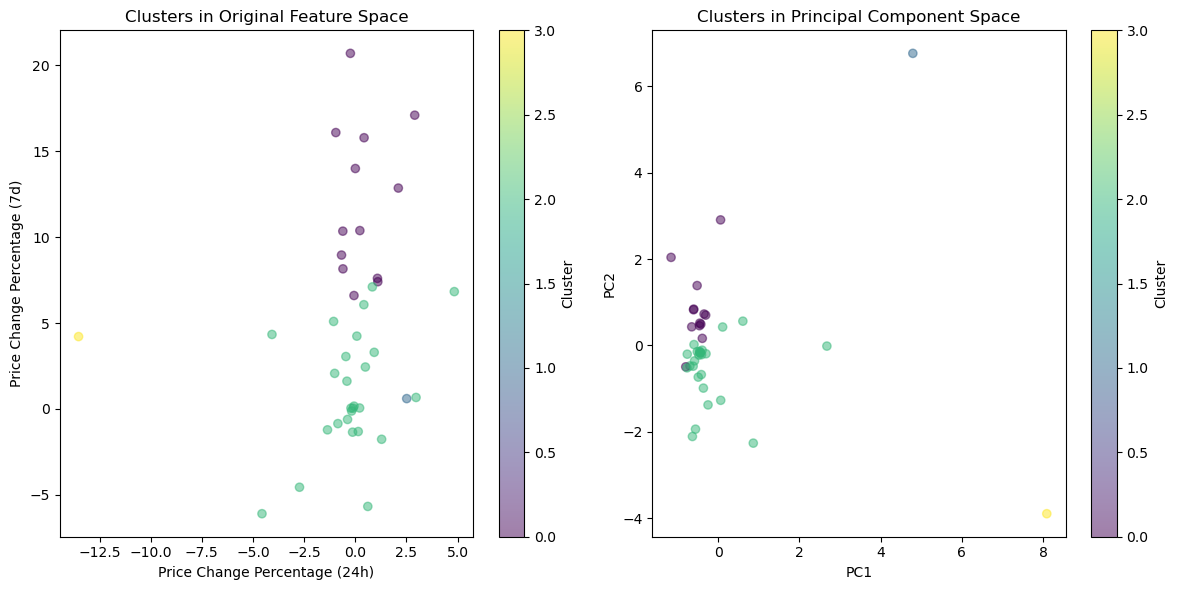

In [59]:
# Plot the clusters in the original feature space
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_market_data['price_change_percentage_24h'], df_market_data['price_change_percentage_7d'], c=df_market_data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters in Original Feature Space')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.colorbar(label='Cluster')

# Plot the clusters in the principal component space
plt.subplot(1, 2, 2)
plt.scatter(df_pca_data['PC1'], df_pca_data['PC2'], c=df_pca_data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters in Principal Component Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Based on the provided information, it seems that clustering the data using fewer features, particularly in the principal component space, has compressed the spread of the data points along both the x and y axes. In the original feature space, where all features are considered, the data points are more spread out, spanning a wider range along both axes. However, in the principal component space, where the dimensionality of the data is reduced, the spread of the data points is more constrained.

This compression of the data points in the principal component space could indicate that some of the variability in the original data has been captured by the principal components, allowing for a more concise representation of the data. However, it's important to note that this compression may also result in information loss, as the reduced-dimensional space may not fully capture all the nuances present in the original data.